In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader

import sys, os
sys.path.append('..')

from generator import *
from discriminator import *
from trainer import *
from hiragana_dataset import make_input3

<AxesSubplot: >

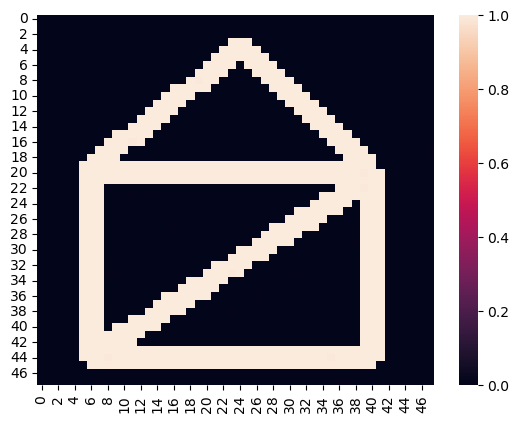

In [2]:
path = '../house.jpg'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
src = (~image)/255
inputs = torch.from_numpy(make_input3(src)).type(torch.float32)
sns.heatmap(inputs.cpu().detach().numpy()[0, -1])

In [30]:
torch.save(inputs, "../model/house/input.pt")

In [3]:
inputs.shape

torch.Size([1, 3, 48, 48])

In [3]:
img_size = 48

<AxesSubplot: >

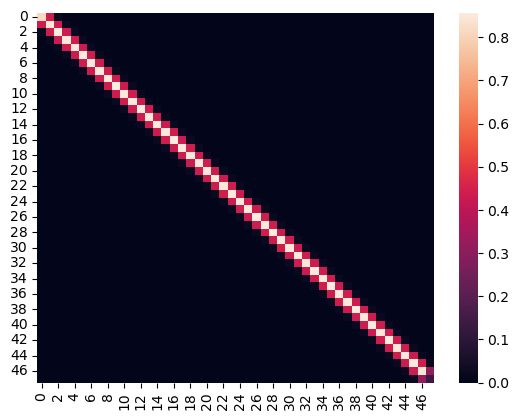

In [4]:
plotline = PlotLine2(img_size)
test = plotline(torch.tensor([[[0,0,0.25],
                               [47,47,0.25]]]))
sns.heatmap(test.cpu().detach().numpy()[0])

<AxesSubplot: >

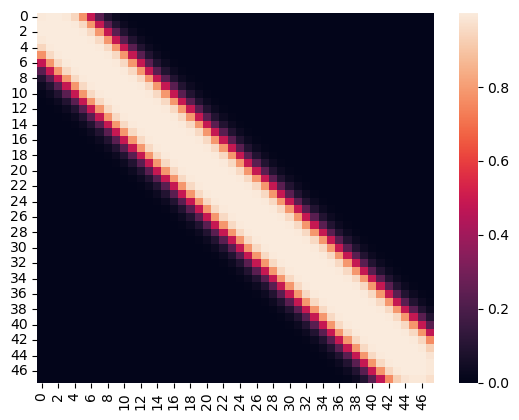

In [6]:
test = plotline(torch.tensor([[[0,0,4],
                               [47,47,4]]]))
sns.heatmap(test.cpu().detach().numpy()[0])

In [5]:
disc = Discriminator3(img_size)

<AxesSubplot: >

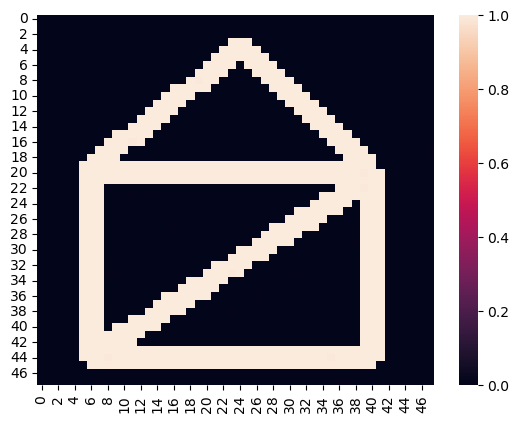

In [6]:
labels = inputs[:, -1]
sns.heatmap(labels.cpu().detach().numpy()[0])

In [7]:
os.mkdir("../model/house2")

In [5]:
mask = nn.Transformer.generate_square_subsequent_mask(16).T

In [ ]:
# gen = Generator8_2(w_m=0, w_M=4, mask=mask) #bridge a600b50
# losses, errors, distances = train1_schedule5(
#     gen, disc, inputs, labels, 
#     iteration=5000, start_factor=0.1, end_factor=0.8, total_iters=40, 
#     start_p=0.5, alpha=500, beta=50,
#     folder="star2"
# )

In [10]:
gen = Generator8_2(w_m=0, w_M=4, mask=mask) #bridge a600b50
losses, errors, distances = train1_schedule5_2(
    gen, disc, inputs, labels, 
    iteration=5000, start_factor=0.1, end_factor=0.8, total_iters=40, 
    start_p=0.5, alpha=400, beta=50,
    folder="house2"
)

using: cpu
iter: 100, loss: 47244.4148828125
iter: 200, loss: 35057.80431640625
iter: 300, loss: 26395.50998046875
iter: 400, loss: 16454.666201171876
iter: 500, loss: 12559.087065429687
iter: 600, loss: 10598.322543945313
iter: 700, loss: 9135.693618164063
iter: 800, loss: 7914.290473632813
iter: 900, loss: 7124.847814941406
iter: 1000, loss: 6390.47912109375
iter: 1100, loss: 5735.787683105469
iter: 1200, loss: 5085.512900390625
iter: 1300, loss: 4828.681828613281
iter: 1400, loss: 4293.6521508789065
iter: 1500, loss: 3983.9532250976563
iter: 1600, loss: 3830.1078125
iter: 1700, loss: 3510.8643994140625
iter: 1800, loss: 3166.1554760742188
iter: 1900, loss: 3012.6751953125
iter: 2000, loss: 2788.440701904297
iter: 2100, loss: 2593.5090966796874
iter: 2200, loss: 2323.4330310058594
iter: 2300, loss: 2323.173739013672
iter: 2400, loss: 2195.567032470703
iter: 2500, loss: 2075.08072265625
iter: 2600, loss: 2037.4563793945313
iter: 2700, loss: 1965.8281982421875
iter: 2800, loss: 1898.79

In [6]:
gen_ = Generator8_2(w_m=0, w_M=4, mask=mask)
gen_.load_state_dict(torch.load("../model/house/best.pt"))

<All keys matched successfully>

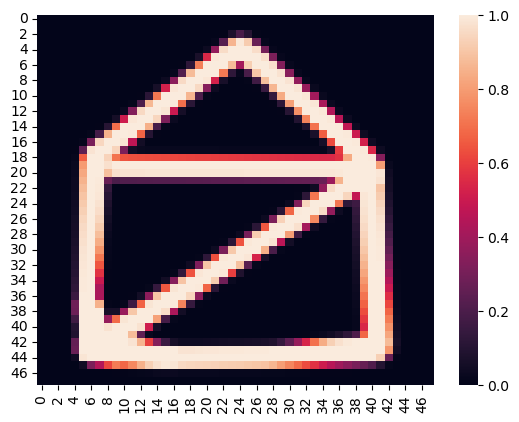

In [7]:
xyw = gen_(inputs)
line = plotline(xyw)
sns.heatmap(line.detach().numpy()[0])
plt.show()

In [11]:
gen_.save_x.shape

torch.Size([16, 1, 36])

In [12]:
gen_.save_x.mean(0)

tensor([[0.1976, 0.4581, 0.3318, 0.5453, 0.5472, 0.3052, 0.4473, 0.4589, 0.1825,
         0.4881, 0.6653, 0.3488, 0.6066, 0.4122, 1.1204, 0.9323, 0.7088, 0.9916,
         0.8038, 0.4635, 0.9984, 0.3120, 0.6154, 0.8981, 0.8749, 0.6752, 0.3764,
         0.4210, 0.7342, 0.5588, 0.8905, 1.2944, 1.4731, 1.7070, 1.4391, 1.2054]])

<AxesSubplot: >

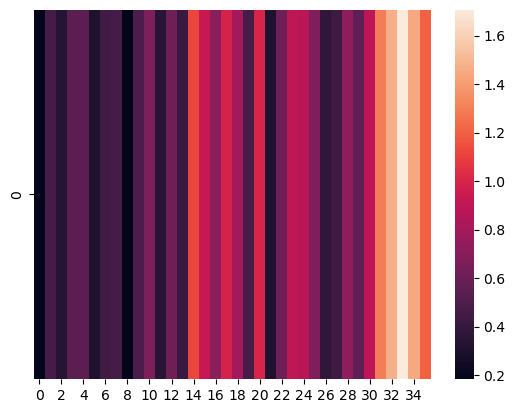

In [15]:
sns.heatmap(gen_.save_x.mean(0).numpy())

In [18]:
gen_.save_x.median(0)

torch.return_types.median(
values=tensor([[0.0000, 0.3582, 0.0000, 0.0000, 0.0000, 0.0000, 0.3147, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0586, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]),
indices=tensor([[14,  3, 10, 10, 13, 13,  3, 10, 10, 12, 10, 13, 14, 14, 15,  1, 10, 11,
         10,  9, 12, 11,  9, 12, 10,  9, 11, 11, 11, 11, 10, 12, 12, 14, 13, 15]]))

<AxesSubplot: >

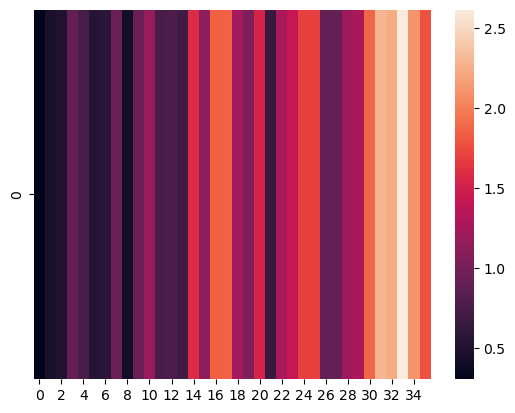

In [16]:
sns.heatmap(gen_.save_x.std(0).numpy()) #前半部でPEが行われることがよく分かる

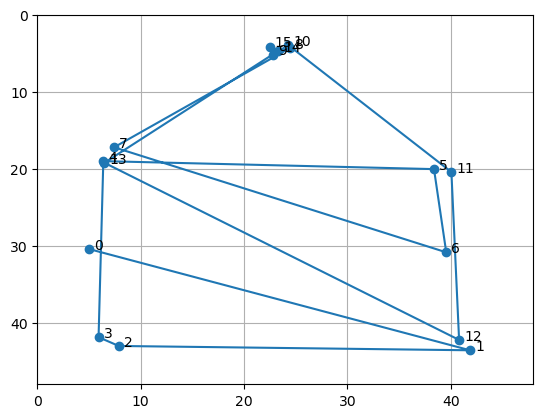

In [13]:
xy = xyw.detach().numpy()[0, :, 0:2]

fig, ax = plt.subplots(1,1)
ax.set_xlim(0, 48)
ax.set_ylim(0, 48)
ax.invert_yaxis()
ax.grid()
ax.plot(xy[:, 1], xy[:, 0], marker='o')
annotations = range(16)
for i, label in enumerate(annotations):
    plt.annotate(label, (xy[:, 1][i]+0.5, xy[:, 0][i]))
plt.show()

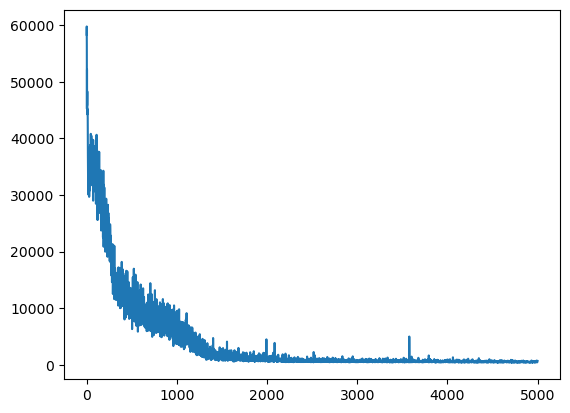

In [48]:
plt.plot(losses)